#### Steps to follow 
- Preprocess + EDA + Feature Selection
- Extract input and output cols
- Scale the values
- Train test split
- Train the model
- Evaluate the model/model selection
- Deploy the model


In [61]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load
# 
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# 
# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# 
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))
# 
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/day-13-student-performance-raw/day_13_student_performance_raw.csv


In [62]:
import pandas as pd

df = pd.read_csv('/kaggle/input/day-13-student-performance-raw/day_13_student_performance_raw.csv')

## Mapping 1 to 'Yes' and 0 to 'No' for the 'placement' column
# df['placement'] = df['placement'].map({1: 'Yes', 0: 'No'})
# df.placement = df.placement.replace({'Yes':1,'No':0})

In [63]:
df

,id,name,cgpa,iq,age,dob,college,gender,math_score,placement
0,1,Student1,6.8,123,21,40:06.7,College A,Female,71,1
1,2,Student2,5.9,106,19,40:06.7,College B,Male,91,0
2,3,Student3,5.3,121,18,40:06.7,College C,Female,69,0
3,4,Student4,7.4,132,21,40:06.7,College C,Male,86,1
4,5,Student5,5.8,142,21,40:06.7,College C,Female,74,0
...,...,...,...,...,...,...,...,...,...,...
95,96,Student96,4.3,200,22,40:06.7,College C,Female,84,0
96,97,Student97,4.4,42,18,40:06.7,College C,Male,43,0
97,98,Student98,6.7,182,23,40:06.7,College C,Female,55,1
98,99,Student99,6.3,103,22,40:06.7,College B,Male,63,1


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          100 non-null    int64  
 1   name        100 non-null    object 
 2   cgpa        100 non-null    float64
 3   iq          100 non-null    int64  
 4   age         100 non-null    int64  
 5   dob         100 non-null    object 
 6   college     100 non-null    object 
 7   gender      100 non-null    object 
 8   math_score  100 non-null    int64  
 9   placement   100 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 7.9+ KB


In [65]:
df = df[['cgpa','iq','placement']]

# features = iq, cgpa
# depended_var = placement

In [66]:
df.placement.unique()

array([1, 0])

In [67]:
import matplotlib.pyplot as plt

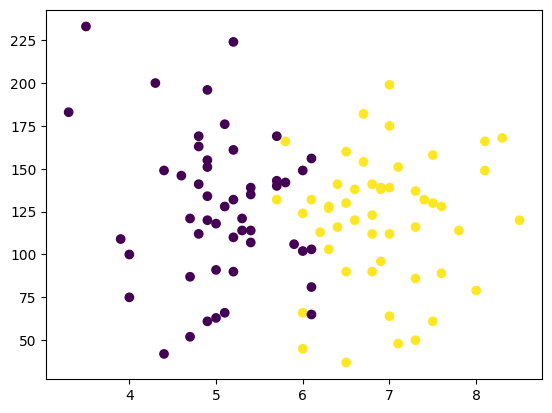

In [68]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [69]:
x_features = df.iloc[:,0:2]
x_features

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [70]:
y = df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train, y_test = train_test_split(x_features,y,test_size=0.1)

print(x_train, x_test)
# print(y_train, y_test)

    cgpa   iq
85   5.8  166
90   7.3   86
64   7.0   64
44   7.5   61
86   5.1  128
..   ...  ...
39   4.6  146
57   6.5  130
70   6.3  127
54   6.4  141
38   6.5  160

[90 rows x 2 columns]     cgpa   iq
96   4.4   42
59   4.8  112
53   8.3  168
17   3.3  183
22   4.9  120
37   8.1  149
30   7.6  128
21   7.1  151
73   4.9   61
87   5.7  132


In [72]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

# print(x_test)
# print(x_train)

# type(x_train) ## numpy.ndarray

In [73]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

model = lg.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [74]:
## Prediction Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.9

<Axes: >

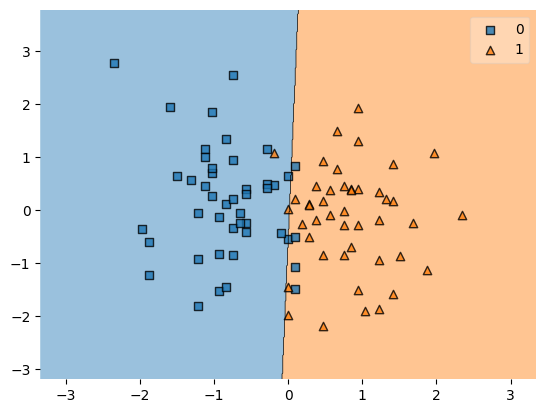

In [75]:
## Visualise Predictions
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values, clf=model, legend)

In [76]:
## Dump Trained Model to file
import pickle
pickle.dump(model,open('day_13_student_performance_model.pkl','wb'))